# San Carlos Mud Slide Case

Submit an Jupyter notebook (.ipynb file) which uses a decision tree to analyzes the "San Carlos Mud Slide" case in DMD 2.14. In the Jupyter notebook, graph a decision tree with the values of each node shown. Also, conduct a sensitivity analysis by considering several other values for the probability of the mud slide (other than 1% as in the case). Finally, create a plot of the value of the two main decisions (Test and NoTest) as a function of the probability of a mud slide, as the probability ranges from 0.1% to 10% (similar to the last plot in the course note to session 3-decision trees).

This is similar to what you did in Lab 1, except for a new decision tree. You may use the decisiontrees.py file provided during Lab 1, which is also attached here for your convenience. (You can import the Node class as in the Lab, as long as this file is in the same folder as the Jupyter notebook.) For this homework, you must use Python and Jupyter notebook. No hand drawn graphs are allowed.

## Decision Tree

In [1]:
from decisiontrees import Node

In [27]:
# Parameters for the decision tree

Wall_Cost=40000
Road_Cost=1000000

Slide_Occur=0.01
Break_Through=0.05

Pos_Given_Slide=0.9
Neg_Given_No_Slide=0.85



In [25]:
def buildTreeSlide():    

    #no test: Wall or no Wall
    ##Wall
    Slide_With_Wall=Slide_Occur*Break_Through

    #test:Pos or Neg ---- Slide or No Slide
    Pos_And_Slide=Pos_Given_Slide*Slide_Occur
    Pos_And_No_Slide=(1-Neg_Given_No_Slide)*(1-Slide_Occur)
    Neg_And_Slide=(1-Pos_Given_Slide)*Slide_Occur
    Neg_And_No_Slide=Neg_Given_No_Slide*(1-Slide_Occur)


    #test:Pos or Neg
    P_TestPos=Pos_And_Slide+Pos_And_No_Slide
    P_TestNeg=Neg_And_Slide+Neg_And_No_Slide
    

    Slide_Given_Pos=Pos_And_Slide/P_TestPos
    No_Slide_Given_Pos=Pos_And_No_Slide/P_TestPos
    Slide_Given_Neg=Neg_And_Slide/P_TestNeg
    No_Slide_Given_Neg=Neg_And_No_Slide/P_TestNeg

    
    
    # Build the tree. For outcome nodes, we assign the value, which is the net profit from that outcome. 
    # For decision nodes, we give a list of children (branches from the node corresponding to possible decisions).
    # For event nodes, we give first a list of the children, then a list of the corresponding probabilities.

    ##no test & no wall
    No_Slide_No_Wall=Node('No Slide',value=0)
    Slide_No_Wall=Node('Slide',value=-Road_Cost)
    No_Test_No_Wall=Node('No Wall',[Slide_No_Wall,No_Slide_No_Wall],[Slide_Occur,1-Slide_Occur])

    ##no test with wall    
    No_Slide_Wall=Node('No Slide',value=-Wall_Cost)
    Slide_Wall_Break=Node('Break Through',value=-Wall_Cost-Road_Cost)
    Slide_Wall_No_Break=Node('Not Break Through',value=-Wall_Cost)
    Slide_Wall=Node('Slide',[Slide_Wall_Break,Slide_Wall_No_Break],[Break_Through,1-Break_Through])
    No_Test_Wall=Node('Wall',[Slide_Wall,No_Slide_Wall],[Slide_Occur,1-Slide_Occur])
    
    ##no test
    No_test=Node('No test',[No_Test_No_Wall,No_Test_Wall])

    ##test & positive & No Wall
    TestPos_NoWall_NoSlide=Node('No Slide',value=0)
    TestPos_NoWall_Slide=Node('Slide',value=-Road_Cost)
    TestPos_NoWall=Node('No Wall',[TestPos_NoWall_Slide,TestPos_NoWall_NoSlide],[Slide_Given_Pos,No_Slide_Given_Pos])
    
    ##test & positive & Wall
    TestPos_Wall_NoSlide=Node('No Slide',value=-Wall_Cost)
    TestPos_Wall_Slide_No_Break=Node('Not Break Through',value=-Wall_Cost)
    TestPos_Wall_Slide_Break=Node('Break Through',value=-Wall_Cost-Road_Cost)
    TestPos_Wall_Slide=Node('Slide',[TestPos_Wall_Slide_Break,TestPos_Wall_Slide_No_Break],[Break_Through,1-Break_Through])
    TestPos_Wall=Node('Wall',[TestPos_Wall_Slide,TestPos_Wall_NoSlide],[Slide_Given_Pos,No_Slide_Given_Pos])

    ##test & positive 
    TestPos=Node('Test Positive',[TestPos_Wall,TestPos_NoWall])

    ##test & negative & No Wall
    TestNeg_NoWall_NoSlide=Node('No Slide',value=0)
    TestNeg_NoWall_Slide=Node('Slide',value=-Road_Cost)
    TestNeg_NoWall=Node('No Wall',[TestNeg_NoWall_Slide,TestNeg_NoWall_NoSlide],[Slide_Given_Neg,No_Slide_Given_Neg])
    
    ##test & negative & Wall
    TestNeg_Wall_NoSlide=Node('No Slide',value=-Wall_Cost)
    TestNeg_Wall_Slide_No_Break=Node('Not Break Through',value=-Wall_Cost)
    TestNeg_Wall_Slide_Break=Node('Break Through',value=-Wall_Cost-Road_Cost)
    TestNeg_Wall_Slide=Node('Slide',[TestNeg_Wall_Slide_Break,TestNeg_Wall_Slide_No_Break],[Break_Through,1-Break_Through])
    TestNeg_Wall=Node('Wall',[TestNeg_Wall_Slide,TestNeg_Wall_NoSlide],[Slide_Given_Neg,No_Slide_Given_Neg])

    ##test & negative 
    TestNeg=Node('Test Negative',[TestNeg_Wall,TestNeg_NoWall])

    ##test
    Test=Node('Test',[TestPos,TestNeg],[(P_TestPos),(P_TestNeg)])
    
    ##tree
    Tree_Slide=Node('Mud Slide',[No_test,Test])
    return Tree_Slide

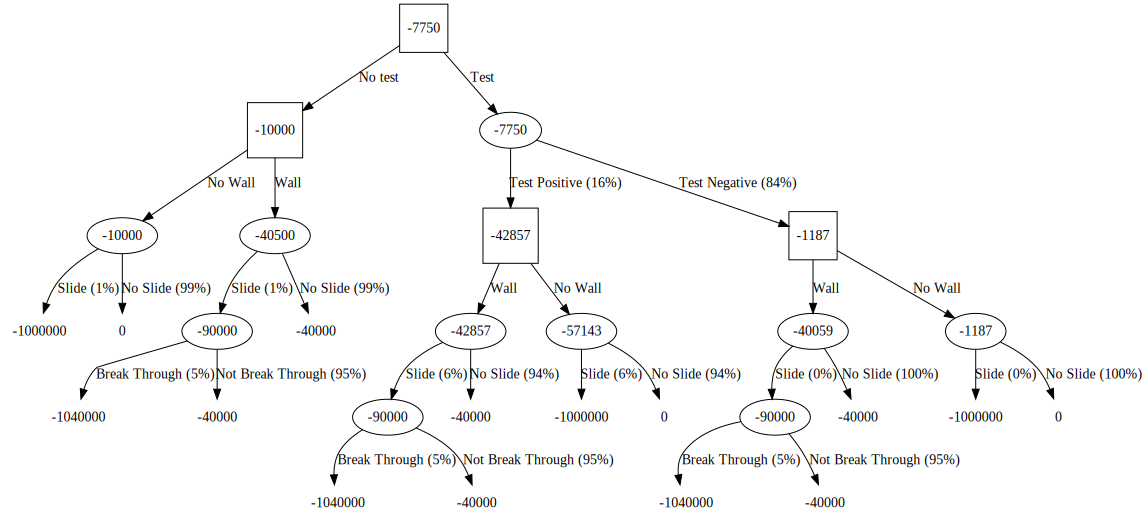

In [28]:
buildTreeSlide().graph()

### Optimal

Test first, and if positive, build wall, if negative, no wall.

## Sensitivity Analysis 

Also, conduct a sensitivity analysis by considering several other values for the probability of the mud slide (other than 1% as in the case). Finally, create a plot of the value of the two main decisions (Test and NoTest) as a function of the probability of a mud slide, as the probability ranges from 0.1% to 10% (similar to the last plot in the course note to session 3-decision trees).

### P(Slide)=5%

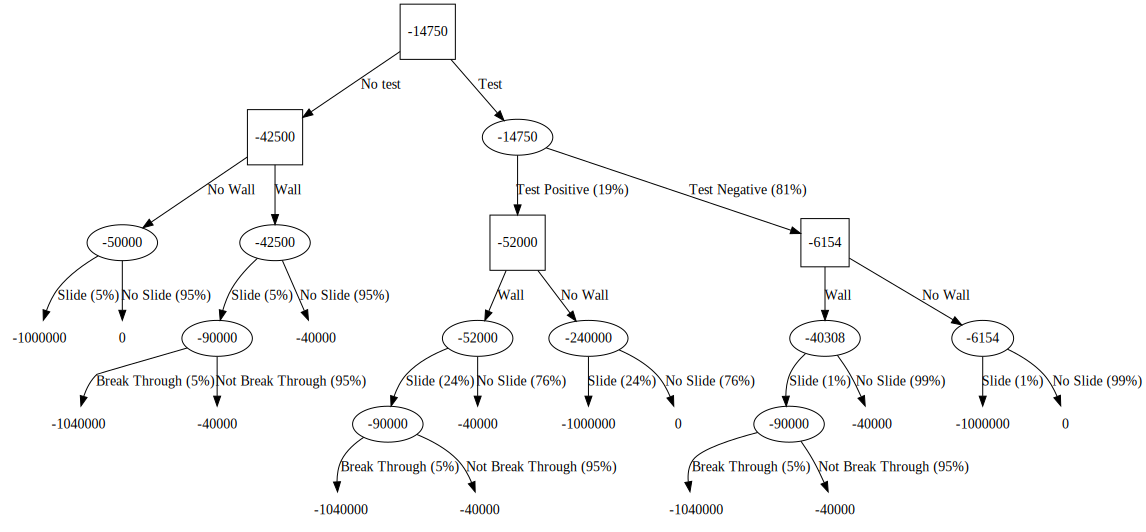

In [32]:
Wall_Cost=40000
Road_Cost=1000000

Slide_Occur=0.05
Break_Through=0.05

Pos_Given_Slide=0.9
Neg_Given_No_Slide=0.85

buildTreeSlide().graph()

Optimal Strategy: same as earlier: Test first, and if positive, build wall, if negative, no wall.

### P(Slide)=0.5%

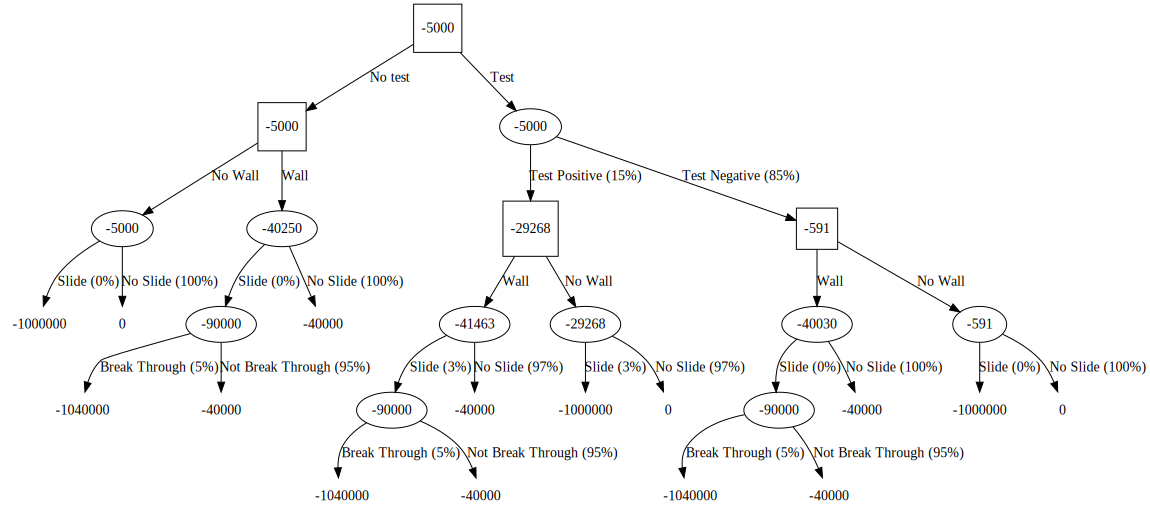

In [33]:
Wall_Cost=40000
Road_Cost=1000000

Slide_Occur=0.005
Break_Through=0.05

Pos_Given_Slide=0.9
Neg_Given_No_Slide=0.85

buildTreeSlide().graph()

Optimal Strategy: No test or test have the same expected value. Either test or no test is fine, and no wall no matter what.

## Plot

In [35]:
import matplotlib.pyplot as plt

In [ ]:
Slide_Occur=range(0.01,0.1,0.01)
Test=[]
NoTest=[]
for 